In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
from pandas import Series,DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [2]:
a=pd.read_csv('/Users/Jessie 1/Desktop/CU/Spring22/STAT5291/project/traindata.csv')
a.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Bill_pca1,Bill_pca2,sumpay,age_new,default.payment.next.month
0,1,20000.0,2,2,1,0.0,689.0,0.0,0.0,0.0,0.0,-1.614228,0.007532,-2,1,1
1,2,120000.0,2,2,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-1.548731,-0.070423,3,1,1
2,3,90000.0,2,2,2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-1.022521,0.012090,0,2,0
3,4,50000.0,2,2,1,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-0.215521,0.179939,0,2,0
4,5,50000.0,1,2,1,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-0.952861,-0.236735,-2,3,0


In [3]:
a.shape

(20000, 16)

In [4]:
a.describe()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Bill_pca1,Bill_pca2,sumpay,age_new,default.payment.next.month
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,10000.500000,163301.184000,1.614050,1.836950,1.556650,5521.068200,5.746194e+03,4734.48815,4725.797750,4758.792600,5080.159350,-2.659000e-10,2.974000e-10,-0.911700,1.786950,0.227900
std,5773.647028,128746.703255,0.486831,0.769542,0.522785,15250.374823,2.151862e+04,15823.31417,15180.461542,15447.369651,17306.821534,2.332610e+00,5.458417e-01,5.910402,0.712941,0.419488
min,1.000000,10000.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-3.966195e+00,-6.787384e+00,-12.000000,1.000000,0.000000
25%,5000.750000,50000.000000,1.000000,1.000000,1.000000,967.750000,7.407500e+02,322.00000,237.750000,216.000000,10.000000,-1.473567e+00,-1.630588e-01,-5.000000,1.000000,0.000000
50%,10000.500000,130000.000000,2.000000,2.000000,2.000000,2084.000000,2.000000e+03,1593.00000,1496.500000,1500.000000,1407.000000,-8.645734e-01,-4.536477e-02,0.000000,2.000000,0.000000
75%,15000.250000,230000.000000,2.000000,2.000000,2.000000,5000.000000,5.000000e+03,4054.50000,4000.000000,4000.000000,4000.000000,4.436441e-01,9.790291e-02,0.000000,2.000000,0.000000
max,20000.000000,1000000.000000,2.000000,6.000000,3.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,3.183719e+01,7.093761e+00,36.000000,4.000000,1.000000


In [5]:
X = a.iloc[:,: -1]

# rename y 
a = a.rename(columns={"default.payment.next.month": "default_payment_next_month"})
a

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Bill_pca1,Bill_pca2,sumpay,age_new,default_payment_next_month
0,1,20000.0,2,2,1,0.0,689.0,0.0,0.0,0.0,0.0,-1.614228,0.007532,-2,1,1
1,2,120000.0,2,2,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-1.548731,-0.070423,3,1,1
2,3,90000.0,2,2,2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-1.022521,0.012090,0,2,0
3,4,50000.0,2,2,1,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-0.215521,0.179939,0,2,0
4,5,50000.0,1,2,1,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-0.952861,-0.236735,-2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,130000.0,2,2,1,5400.0,6950.0,4600.0,4000.0,2000.0,2300.0,2.474786,0.299171,0,2,0
19996,19997,60000.0,2,2,1,3000.0,2570.0,2202.0,1200.0,1100.0,1100.0,0.117506,0.283361,0,2,1
19997,19998,290000.0,2,2,1,0.0,0.0,9194.0,0.0,399.0,9290.0,-1.519021,-0.129825,-6,2,0
19998,19999,150000.0,2,2,1,3000.0,2306.0,2610.0,0.0,620.0,0.0,-1.588205,0.006944,-4,2,0


In [6]:
# drop the last column - default.payment.next.month
X = a.iloc[:,: -1]
y_c = a['default_payment_next_month']

zscore = lambda x: (x-x.mean()) / x.std()

X_zscore = X.apply(zscore,axis=0)
default_zscore = zscore(a.default_payment_next_month)

y_c.value_counts().sort_index()

0    15442
1     4558
Name: default_payment_next_month, dtype: int64

In [7]:
# treat columns sex, education, marriage, and sumpay as catogrical variables
a["SEX"] = pd.Categorical(a["SEX"])
a["EDUCATION"] = pd.Categorical(a["EDUCATION"])
a["MARRIAGE"] = pd.Categorical(a["MARRIAGE"])
a["sumpay"] = pd.Categorical(a["sumpay"])

X = a.iloc[:,: -1]
y = a['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [8]:
print(a.dtypes)

Unnamed: 0                       int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
Bill_pca1                      float64
Bill_pca2                      float64
sumpay                        category
age_new                          int64
default_payment_next_month       int64
dtype: object


In [9]:
a.columns

Index(['Unnamed: 0', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Bill_pca1',
       'Bill_pca2', 'sumpay', 'age_new', 'default_payment_next_month'],
      dtype='object')

In [10]:
Model = []
Accuracy = []

Accuracy is : 0.7436666666666667
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      4668
           1       0.33      0.16      0.21      1332

    accuracy                           0.74      6000
   macro avg       0.56      0.53      0.53      6000
weighted avg       0.69      0.74      0.71      6000



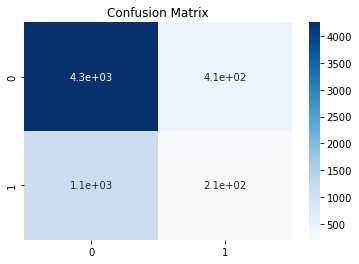

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy is : {acc}")
print(f"Classification Report : \n{report}")
ax = sns.heatmap(matrix, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix');
plt.show()

Model.append('KNN')
Accuracy.append(acc)

Accuracy is : 0.797
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4668
           1       0.63      0.20      0.31      1332

    accuracy                           0.80      6000
   macro avg       0.72      0.59      0.60      6000
weighted avg       0.77      0.80      0.75      6000



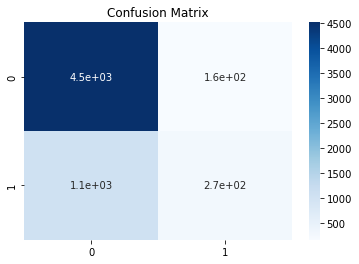

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy is : {acc}")
print(f"Classification Report : \n{report}")
ax = sns.heatmap(matrix, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix');
plt.show()

Model.append('LR')
Accuracy.append(acc)

Accuracy is : 0.7083333333333334
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4668
           1       0.36      0.40      0.38      1332

    accuracy                           0.71      6000
   macro avg       0.59      0.60      0.59      6000
weighted avg       0.72      0.71      0.71      6000



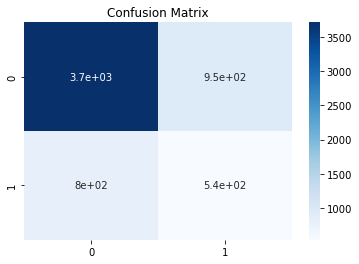

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy is : {acc}")
print(f"Classification Report : \n{report}")
ax = sns.heatmap(matrix, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix');
plt.show()

Model.append('DT')
Accuracy.append(acc)

Accuracy is : 0.7975
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4668
           1       0.59      0.30      0.40      1332

    accuracy                           0.80      6000
   macro avg       0.71      0.62      0.64      6000
weighted avg       0.77      0.80      0.77      6000



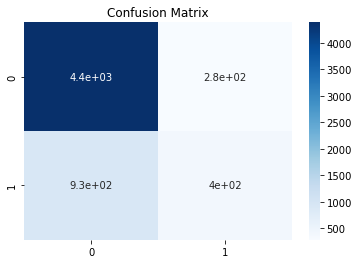

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy is : {acc}")
print(f"Classification Report : \n{report}")
ax = sns.heatmap(matrix, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix');
plt.show()

Model.append('RF')
Accuracy.append(acc)

Accuracy is : 0.8005
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4668
           1       0.60      0.31      0.41      1332

    accuracy                           0.80      6000
   macro avg       0.71      0.62      0.64      6000
weighted avg       0.78      0.80      0.77      6000



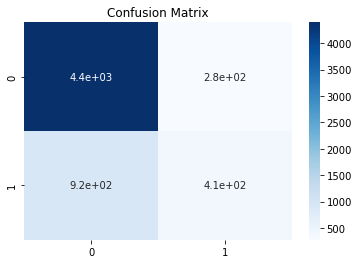

In [15]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy is : {acc}")
print(f"Classification Report : \n{report}")
ax = sns.heatmap(matrix, annot=True, cmap='Blues') 
ax.set_title('Confusion Matrix');
plt.show()

Model.append('GB')
Accuracy.append(acc)

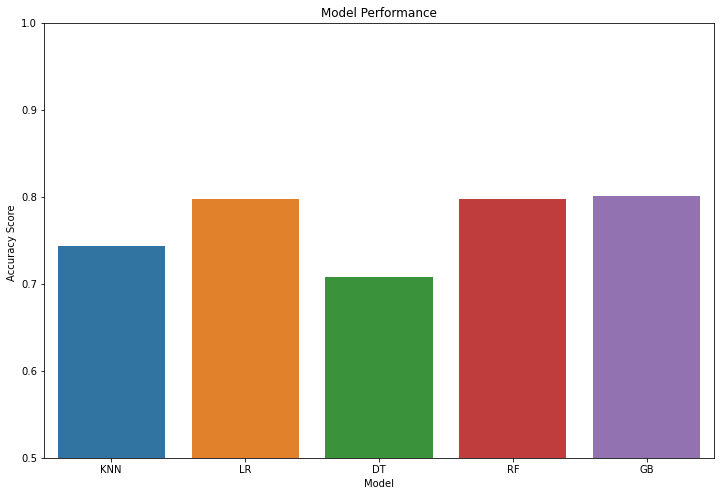

In [16]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=Model,y=Accuracy);
ax.set_title('Model Performance');
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score ');
plt.ylim(0.5,1);

### Model Evaluation

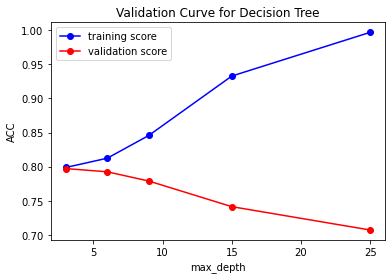

In [17]:
depth = [3,6,9,15,25]
train_scores,test_scores = validation_curve(dt,
                                            X_train, y_train,
                                            param_name='max_depth',
                                            scoring="accuracy",
                                            param_range=depth,
                                            cv=3)
mean_train_scores = np.mean(train_scores,axis=1)
mean_test_scores = np.mean(test_scores,axis=1)

fig,ax = plt.subplots(1,1)
ax.plot(depth, mean_train_scores, 'o-', color='b',label='training score');
ax.plot(depth, mean_test_scores, 'o-', color='r', label='validation score');
ax.set_xlabel('max_depth'), ax.set_ylabel('ACC'); ax.set_title('Validation Curve for Decision Tree');
ax.legend();

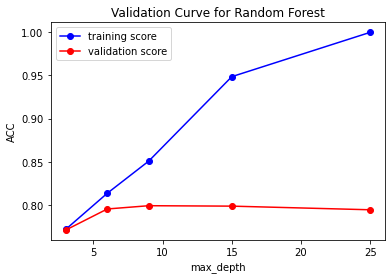

In [18]:
depth = [3,6,9,15,25]
train_scores,test_scores = validation_curve(rf,
                                            X_train, y_train,
                                            param_name='max_depth',
                                            scoring="accuracy",
                                            param_range=depth,
                                            cv=3)
mean_train_scores = np.mean(train_scores,axis=1)
mean_test_scores = np.mean(test_scores,axis=1)

fig,ax = plt.subplots(1,1)
ax.plot(depth, mean_train_scores, 'o-', color='b',label='training score');
ax.plot(depth, mean_test_scores, 'o-', color='r', label='validation score');
ax.set_xlabel('max_depth'), ax.set_ylabel('ACC'); ax.set_title('Validation Curve for Random Forest');
ax.legend();

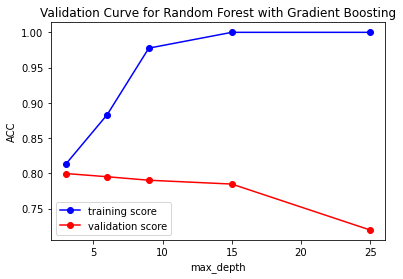

In [19]:
depth = [3,6,9,15,25]
train_scores,test_scores = validation_curve(GradientBoostingClassifier(),
                                            X_train, y_train,
                                            param_name='max_depth',
                                            scoring="accuracy",
                                            param_range=depth,
                                            cv=3)
mean_train_scores = np.mean(train_scores,axis=1)
mean_test_scores = np.mean(test_scores,axis=1)

fig,ax = plt.subplots(1,1)
ax.plot(depth, mean_train_scores, 'o-', color='b',label='training score');
ax.plot(depth, mean_test_scores, 'o-', color='r', label='validation score');
ax.set_xlabel('max_depth'), ax.set_ylabel('ACC'); ax.set_title('Validation Curve for Random Forest with Gradient Boosting');
ax.legend();

sumpay        0.704781
Bill_pca1     0.096402
PAY_AMT2      0.028031
Unnamed: 0    0.027561
PAY_AMT3      0.027185
LIMIT_BAL     0.026909
PAY_AMT1      0.025102
Bill_pca2     0.019759
PAY_AMT4      0.012034
PAY_AMT6      0.010117
MARRIAGE      0.010054
PAY_AMT5      0.005497
age_new       0.002944
EDUCATION     0.002482
SEX           0.001141
dtype: float64


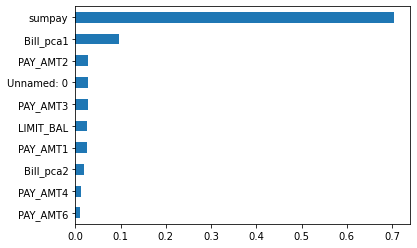

In [20]:
importances = pd.Series(gb.feature_importances_,X.columns).sort_values(ascending = False)
print(importances)

importances.sort_values(ascending=True)[-10:].plot.barh();

In [21]:
def plot_roc(curves):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    lw = 2
    for fpr,tpr,model_name in curves:
        l1, = ax.plot(fpr, tpr, lw=lw, label=model_name)
    ax.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_aspect('equal', 'box')
    ax.set_title('Receiver operating characteristic example')
    ax.legend()

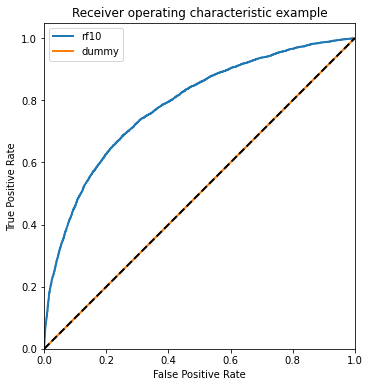

In [22]:
fpr_dtc, tpr_dtc, _ = roc_curve(y, gb.predict_proba(X)[:,-1])

curves = [(fpr_dtc,tpr_dtc,'rf10')]
dummyc = DummyClassifier(strategy='prior').fit(X,y)
fpr_dummyc, tpr_dummyc, _ = roc_curve(y, dummyc.predict_proba(X)[:,1]) # Compare dummy
curves.append((fpr_dummyc,tpr_dummyc,'dummy'));
plot_roc(curves);

In [23]:
# from sklearn.model_selection import cross_val_score
# knn_precision_scores = cross_val_score(knn,X_train,y_train,cv=5,scoring='precision')
# knn_recall_scores    = cross_val_score(knn,X_train,y_train,cv=5,scoring='recall')

# print(f' K Nearest Neighbor precision  : {np.mean(knn_precision_scores):0.2f} +- {2*np.std(knn_precision_scores):0.2f}')
# print(f'K Nearest Neighbor recall     : {np.mean(knn_recall_scores):0.2f} +- {2*np.std(knn_recall_scores):0.2f}')

lr_precision_scores = cross_val_score(lr,X_train,y_train,cv=5,scoring='precision')
lr_recall_scores    = cross_val_score(lr,X_train,y_train,cv=5,scoring='recall')

print(f'logistic regression precision  : {np.mean(lr_precision_scores):0.2f} +- {2*np.std(lr_precision_scores):0.2f}')
print(f'logistic regression recall     : {np.mean(lr_recall_scores):0.2f} +- {2*np.std(lr_recall_scores):0.2f}')


dtc_precision_scores = cross_val_score(dt,X_train,y_train,cv=5,scoring='precision')
dtc_recall_scores    = cross_val_score(dt,X_train,y_train,cv=5,scoring='recall')

print(f'decision tree classifier precision  : {np.mean(dtc_precision_scores):0.2f} +- {2*np.std(dtc_precision_scores):0.2f}')
print(f'decision tree classifier recall     : {np.mean(dtc_recall_scores):0.2f} +- {2*np.std(dtc_recall_scores):0.2f}')

rf_precision_scores = cross_val_score(rf,X_train,y_train,cv=5,scoring='precision')
rf_recall_scores    = cross_val_score(rf,X_train,y_train,cv=5,scoring='recall')

print(f'random forest classifier precision  : {np.mean(rf_precision_scores):0.2f} +- {2*np.std(rf_precision_scores):0.2f}')
print(f'random forest classifier recall     : {np.mean(rf_recall_scores):0.2f} +- {2*np.std(rf_recall_scores):0.2f}')


gb_precision_scores = cross_val_score(gb,X_train,y_train,cv=5,scoring='precision')
gb_recall_scores    = cross_val_score(gb,X_train,y_train,cv=5,scoring='recall')

print(f'gradient boosting classifier precision  : {np.mean(gb_precision_scores):0.2f} +- {2*np.std(gb_precision_scores):0.2f}')
print(f'gradient boosting classifier recall     : {np.mean(gb_recall_scores):0.2f} +- {2*np.std(gb_recall_scores):0.2f}')

/Users/Jessie/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jessie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Jessie/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no p

logistic regression precision  : 0.38 +- 0.62
logistic regression recall     : 0.12 +- 0.20
decision tree classifier precision  : 0.37 +- 0.01
decision tree classifier recall     : 0.39 +- 0.02
random forest classifier precision  : 0.61 +- 0.04
random forest classifier recall     : 0.31 +- 0.01
gradient boosting classifier precision  : 0.62 +- 0.04
gradient boosting classifier recall     : 0.31 +- 0.02
